<a href="https://colab.research.google.com/github/awesome786engineer/Machine-Learning-Projects/blob/main/InstaFakeID_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from huggingface_hub import login
login()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
from datasets import load_dataset
dataset = load_dataset("nahiar/instagram_bot_detection")

In [11]:
df = dataset['train'].to_pandas()
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [12]:
df.shape

(5000, 12)

In [13]:
# shuffle the DF before applying train test split
df_shuffled = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

splitting_point = int(0.8*len(df))
train_df = df_shuffled.iloc[:splitting_point]
test_df = df_shuffled.iloc[splitting_point:]

In [14]:
train_df = train_df.sample(frac = 1,random_state = 42).reset_index(drop = True)
test_df = test_df.sample(frac = 1,random_state = 42).reset_index(drop = True )

In [15]:
train_df.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.000000,1,0.0,0,25,0,0,299,4845,696,0
1,1,0.036261,2,0.0,0,21,0,0,389,754,406,0
2,0,0.617325,1,0.0,0,0,0,0,0,85,31,1
3,1,0.060000,2,0.0,0,11,0,1,19,417,395,0
4,1,0.000000,0,0.0,0,14,0,0,10,291,371,0


In [16]:
test_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,0,0.281669,0,0.000000,0,0,0,0,5,1081,547,1
1,1,0.083349,1,0.062512,0,43,0,0,11,18,42,1
2,0,0.738726,1,0.839461,0,0,0,0,4,53,67,1
3,1,0.000000,2,0.000000,0,4,0,0,11,194,211,0
4,1,0.000000,2,0.000000,0,21,0,0,110,417,279,0


In [17]:
len(train_df),len(test_df)

(4000, 1000)

Here "nums/length" and nums/length_full_name" is ratio of numerical characters in its user name and its full name

## MLWorkFLow ##

1. Data preprocessing used

    -  missing numerical values were replaced by mediian values reducing effect of  outliers
    -  missing categorical values(eg profile picture ) were replaced with mode  
2. Data transformation

    - apply one hot encoding for features "profile pic","private","external URL", presence = 1, absence = 0

3. Outlier Detection and Removal
    
    - use interquartile range or z- score method to detect and remove outlier that might skew the model performance

4. Feature selection

    - to avoid multicollinearity using "CORRELATION MATRIX"
    - lasso (L1) regularization to select importnat features by shrinking the less important features coefficients to zero
    - use RECURSIVE FEATURE ELEMINATION to select top performin features by iteratively training and eliminating weaker features

5. Normalization

    - normalize high performing features

6. Model building using
    - for now logistic regression only
    - later implement 1. KNN ,2. Random Forest,3. SVC(support vector classifier)




In [18]:
# plot the distribution of all numeric features
binary_columns = ["profile pic","name==username","external URL","private","fake"]
non_binary_columns = [col for col in train_df.columns if col not in binary_columns]

In [19]:
len(non_binary_columns)

7

In [20]:
non_binary_columns

['nums/length username',
 'fullname words',
 'nums/length fullname',
 'description length',
 '#posts',
 '#followers',
 '#follows']

In [21]:
# for col in non_binary_columns[]:
#   sns.histplot(data = train_df,x = col,kde = True)
#   plt.show()

In [22]:
# for i in range(5):
#   sns.histplot(data = train_df,x = non_binary_columns[i],kde = True)
#   plt.show()

In [23]:
# calculating skewness of all the attributes
train_df[non_binary_columns].skew()

,0
nums/length username,1.150374
fullname words,2.979278
nums/length fullname,4.088217
description length,1.857134
#posts,12.104331
#followers,15.363481
#follows,3.979301


In [24]:
train_df.corr()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
profile pic,1.000000,-0.514861,0.254278,-0.221323,-0.076474,0.452044,0.187603,0.072260,0.206487,0.073029,0.236829,-0.786461
nums/length username,-0.514861,1.000000,-0.225131,0.453317,0.038497,-0.381569,-0.177070,-0.058910,-0.180174,-0.066262,-0.202779,0.660036
fullname words,0.254278,-0.225131,1.000000,-0.085531,-0.020701,0.316045,0.256554,-0.100964,0.053562,0.049261,0.085277,-0.297957
nums/length fullname,-0.221323,0.453317,-0.085531,1.000000,0.176347,-0.151229,-0.070977,-0.021757,-0.068054,-0.030700,-0.073823,0.298454
name==username,-0.076474,0.038497,-0.020701,0.176347,1.000000,-0.044610,-0.019890,0.036364,-0.022840,-0.007741,-0.017399,0.087060
description length,0.452044,-0.381569,0.316045,-0.151229,-0.044610,1.000000,0.392032,-0.065042,0.169141,0.030240,0.256313,-0.505106
external URL,0.187603,-0.177070,0.256554,-0.070977,-0.019890,0.392032,1.000000,-0.095852,0.133325,0.026522,0.128079,-0.228468
private,0.072260,-0.058910,-0.100964,-0.021757,0.036364,-0.065042,-0.095852,1.000000,-0.066085,-0.047882,-0.052539,-0.039287
#posts,0.206487,-0.180174,0.053562,-0.068054,-0.022840,0.169141,0.133325,-0.066085,1.000000,0.360601,0.117051,-0.248024
#followers,0.073029,-0.066262,0.049261,-0.030700,-0.007741,0.030240,0.026522,-0.047882,0.360601,1.000000,-0.007228,-0.088930


In [25]:
selected_columns = ['profile pic','nums/length username','fullname words','nums/length fullname','description length','external URL','#posts','#follows']
columns_to_drop = ['name==username','private','#followers']

In [26]:
selected_non_binary_columns = [col for col in selected_columns if col in non_binary_columns]
selected_non_binary_columns

['nums/length username',
 'fullname words',
 'nums/length fullname',
 'description length',
 '#posts',
 '#follows']

In [27]:
for col in selected_non_binary_columns:
  print(f"{col} : skewness = {train_df[col].skew()} , range = {train_df[col].min()} - {train_df[col].max()}")

nums/length username : skewness = 1.1503741344632166 , range = 0.0 - 0.92
fullname words : skewness = 2.9792776418491673 , range = 0 - 12
nums/length fullname : skewness = 4.088216751782931 , range = 0.0 - 1.0
description length : skewness = 1.8571338621412463 , range = 0 - 150
#posts : skewness = 12.104331307271657 , range = 0 - 7389
#follows : skewness = 3.9793012041464446 , range = 0 - 7500


# Applying less agressive techniques first

In [61]:
from sklearn.preprocessing import PowerTransformer
def transform(df, pt_train_data = None):
  # Explicitly create a copy to avoid SettingWithCopyWarnin
  df = df.copy()
  pt = PowerTransformer(method='yeo-johnson') # Initialize pt here

  if pt_train_data is None:
    df[selected_non_binary_columns] = pt.fit_transform(df[selected_non_binary_columns])
  else:
    pt = pt_train_data # Use provided transformer
    df[selected_non_binary_columns] = pt.transform(df[selected_non_binary_columns])


  return df,pt # Return the modified DataFrame

In [62]:
new_train_df ,pt_train_data= transform(train_df)

In [63]:
new_train_df[selected_non_binary_columns].skew()

,0
nums/length username,0.310922
fullname words,0.024686
nums/length fullname,1.843374
description length,0.262170
#posts,0.083107
#follows,-0.032459


In [66]:
new_test_df,pt_train_data  = transform(test_df,pt_train_data)

In [67]:
new_test_df[selected_non_binary_columns].skew()

,0
nums/length username,0.226453
fullname words,0.231182
nums/length fullname,1.981696
description length,0.242933
#posts,0.092306
#follows,-0.029429


# DATA SCALING

In [70]:
from sklearn.preprocessing import StandardScaler
def scale_dataframe_columns(df, columns_to_scale,scaler = None):
    # Create a copy to avoid modifying the original DataFrame
    df_scaled = df.copy()

    # Initialize the StandardScaler
    if scaler is None:
      scaler = StandardScaler()
      df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    else:
      df_scaled[columns_to_scale] = scaler.transform(df[columns_to_scale])
    return df_scaled, scaler

In [71]:
new_train_df,scaler_train_data = scale_dataframe_columns(new_train_df,selected_columns)

In [72]:
new_test_df,scaler_train_data = scale_dataframe_columns(new_test_df,selected_columns,scaler_train_data)

# Applying Logistic regression on symmmetric data #
- Using Yeo-Johnson power transformer

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train = new_train_df.drop('fake',axis = 1)
y_train = new_train_df['fake']
X_test = new_test_df.drop('fake',axis = 1)
y_test = new_test_df['fake']


# Logistic regression without sklearn (Custom CODE) #

In [75]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [76]:
def compute_cost_vectorized(X, w, b, y):
  m = X.shape[0]
  z = X @ w + b  # (m,n) @ (n,) -> (m,). Vectorized dot product for all examples!
  f_wb = sigmoid(z) # (m,) vector of all predictions

  # Element-wise operations on the entire vectors
  cost = -y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)
  total_cost = np.sum(cost) / m

  return total_cost


In [77]:
def gradient_functions_vectorized(X, w, b, y):
  m, n = X.shape
  z = X @ w + b      # (m,) vector of z for all examples
  f_wb = sigmoid(z)  # (m,) vector of all predictions

  error = f_wb - y   # (m,) vector of all errors

  # (m,) * (m, n) is not what we want. We need (n,) result.
  # So we do (n, m) @ (m,) -> (n,)
  dj_dw = (X.T @ error) / m # transpose of X(m,n) is X.T(n,m)
  dj_db = np.sum(error) / m

  return dj_dw, dj_db

In [78]:
def train_vectorized(X, y, alpha, num_iters):
  cost_history =[]
  w = np.zeros(X.shape[1])
  b = 0
  for i in range(num_iters):
    dj_dw, dj_db = gradient_functions_vectorized(X, w, b, y)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i % 5000 == 0: # Check cost less frequently to save time
        cost = compute_cost_vectorized(X, w, b, y)
        cost_history.append(cost)
        print(f"Iteration {i:5d}: Cost {cost:0.4f}")

  return w, b, cost_history


In [79]:
def predict_vectorized(X, w, b):
  z = X @ w + b
  f_wb = sigmoid(z)
  p = f_wb >= 0.5 # Creates a boolean array
  return p.astype(int)

In [80]:
w, b,cost_history = train_vectorized(X_train[selected_columns].values,y_train,0.01,40000)

Iteration     0: Cost 0.6878
Iteration  5000: Cost 0.1542
Iteration 10000: Cost 0.1437
Iteration 15000: Cost 0.1387
Iteration 20000: Cost 0.1357
Iteration 25000: Cost 0.1337
Iteration 30000: Cost 0.1322
Iteration 35000: Cost 0.1312


In [81]:
y_pred = predict_vectorized(X_test[selected_columns].values,w,b)

In [82]:
accuracy_score(y_test,y_pred)

0.961

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       497
           1       0.97      0.95      0.96       503

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



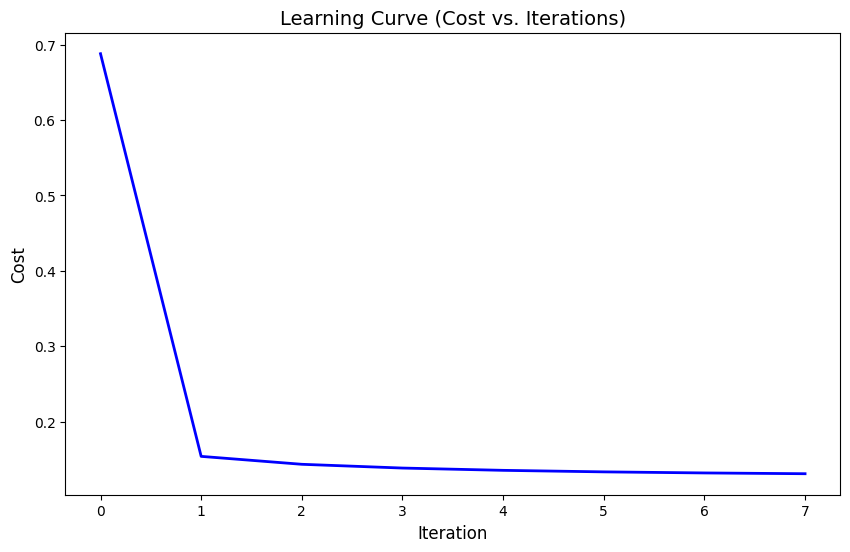

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(len(cost_history)),  # X-axis: iteration numbers (0 to 9999)
    cost_history,              # Y-axis: cost values
    color='blue',
    linestyle='solid',
    linewidth=2
)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Learning Curve (Cost vs. Iterations)', fontsize=14)
plt.show()


In [85]:
w,b

(array([-3.07251766e+00,  1.60256762e+00, -1.57089383e-01,  5.51542823e-01,
        -5.99053719e-01, -3.12165363e-01, -1.82960766e+00,  2.86772471e-03]),
 np.float64(2.367419946233355))

In [86]:
# testing on real account
w = np.array([-3.07251766e+00,  1.60256762e+00, -1.57089383e-01,  5.51542823e-01,
        -5.99053719e-01, -3.12165363e-01, -1.82960766e+00,  2.86772471e-03])
b = 2.3674199462333547

In [87]:
selected_columns

['profile pic',
 'nums/length username',
 'fullname words',
 'nums/length fullname',
 'description length',
 'external URL',
 '#posts',
 '#follows']

## Note: Here the power_transformer "pt_train_data"  is fited  on "selected_non_binary_columns" of train_df only while standard scaler "scaler_train_data" were fitted on train_df's "selected_columns"

In [88]:
def process_and_predict(raw_record, pt, scaler, indices, w, b, threshold):
    # .reshape(1, -1) is crucial as transformers expect a 2D array.
    values_to_process = raw_record[indices].reshape(1, -1)

    # 2. Apply the PowerTransformer FIRST.
    power_transformed_values = pt.transform(values_to_process)
    # "power_transformed_values" is a 2d array

    # 3. Apply the StandardScaler to the OUTPUT of the power transform.
    fully_processed_values = scaler.transform(power_transformed_values)
    # "fully_processed_values" is a 2D array

    # 4. Create the final array by placing the processed values back.
    final_record = raw_record.copy()
    final_record[indices] = fully_processed_values[0]

    # 5. Calculate the prediction probability and print the results.
    probability = sigmoid(final_record @ w + b)
    is_not_fake = probability < threshold
    print(f"Is Not Fake: {is_not_fake} (Probability: {probability:.4f})")

In [90]:
non_binary_indices = [1, 2, 3, 4, 5, 7]
threshold = 0.85
all_records = {
    "Person 1": np.array([1,0.25,7,0,19,0,0,220]),
    "Person 2": np.array([1,0.1764,22,0,37,0,7,308]),
    "Person 3": np.array([1,0.1666,13,0,0,0,0,736]),
    "Person 4": np.array([0,0.1111,17,0,0,0,0,247]),
    "Person 5": np.array([0,0.1818,16,0,19,0,0,312]),
    "Random 1": np.array([0,0.85,6,0.15,20,1,788,678])
}

for name, record_data in all_records.items():
  print(f"_________{name}______")
  process_and_predict(
      record_data,
      pt_train_data,                  # Your pre-fitted power transformer
      scaler_train_data,   # Your pre-fitted scaler
      non_binary_indices,
      w,
      b,
      threshold
  )


_________Person 1______
Is Not Fake: True (Probability: 0.3956)
_________Person 2______
Is Not Fake: True (Probability: 0.0000)
_________Person 3______
Is Not Fake: True (Probability: 0.4279)
_________Person 4______
Is Not Fake: False (Probability: 0.8866)
_________Person 5______
Is Not Fake: True (Probability: 0.8480)
_________Random 1______
Is Not Fake: True (Probability: 0.0000)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skle